In [1]:
!nvidia-smi

Tue Aug 12 14:32:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import files
files.upload()  # Choose your kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maheenbadeghar","key":"d66245ea73dc75ac72100ada72bfd0ba"}'}

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3715.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3716.jpg  
  inflating:

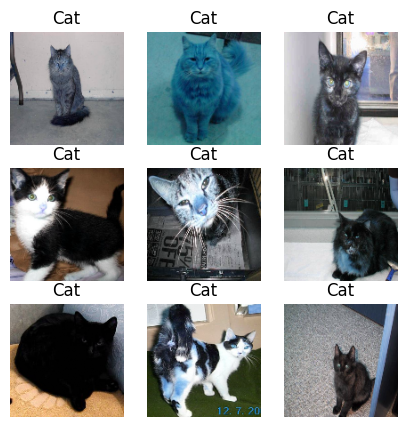

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

IMG_SIZE = 128
data = []
labels = []

for category in ["cats", "dogs"]:
    path = os.path.join("dataset", "training_set", "training_set", category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        if img_array is not None:
            resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(resized)
            labels.append(0 if category == "cats" else 1)

data = np.array(data) / 255.0
labels = np.array(labels)

# Show first 9 images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(data[i])
    plt.title("Cat" if labels[i]==0 else "Dog")
    plt.axis("off")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.5342 - loss: 0.8848 - val_accuracy: 0.7139 - val_loss: 0.6084
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6855 - loss: 0.5865 - val_accuracy: 0.7102 - val_loss: 0.5767
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7610 - loss: 0.4906 - val_accuracy: 0.7439 - val_loss: 0.5350
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8182 - loss: 0.3911 - val_accuracy: 0.7177 - val_loss: 0.6080
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8788 - loss: 0.2836 - val_accuracy: 0.7202 - val_loss: 0.6340
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9247 - loss: 0.1959 - val_accuracy: 0.7289 - val_loss: 0.7571
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9505 - loss: 0.1291 - val_accuracy: 0.7377 - val_loss: 0.7492
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9666 - loss: 0.0980 - val_acc

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7387 - loss: 1.0646
Test Accuracy: 72.70%


In [13]:
model.save("cat_dog_classifier.keras")

In [14]:
from tensorflow.keras.models import load_model

model = load_model("cat_dog_classifier.keras")

In [15]:
from google.colab import files
import cv2
import numpy as np

IMG_SIZE = 128  # same size used during training

uploaded = files.upload()  # Choose a JPG/PNG of a cat or dog

for filename in uploaded.keys():
    img = cv2.imread(filename)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # batch dimension

    prediction = model.predict(img)
    label = "Dog" if prediction > 0.5 else "Cat"
    print(f"{filename} → {label}")


Saving cat.jpg to cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
cat.jpg → Cat


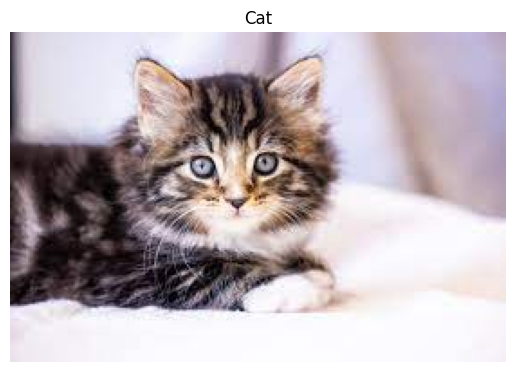

In [16]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB))
plt.title(label)
plt.axis("off")
plt.show()

In [17]:
model.save("cat_dog_classifier.keras")  # new Keras format
# or
model.save("cat_dog_classifier.h5")  # old HDF5 format

In [18]:
model.save("cat_dog_classifier.keras")  # ✅ recommended

In [19]:
from google.colab import files
files.download("cat_dog_classifier.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from tensorflow.keras.models import load_model

model = load_model("cat_dog_classifier.keras")  # Load the saved model

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
from google.colab import files
import cv2
import numpy as np

IMG_SIZE = 128  # Same as training size

uploaded = files.upload()  # Select a cat/dog image

for filename in uploaded.keys():
    img = cv2.imread(filename)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    label = "Dog" if prediction > 0.5 else "Cat"
    print(f"{filename} → {label}")


Saving abc.jpg to abc.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
abc.jpg → Cat


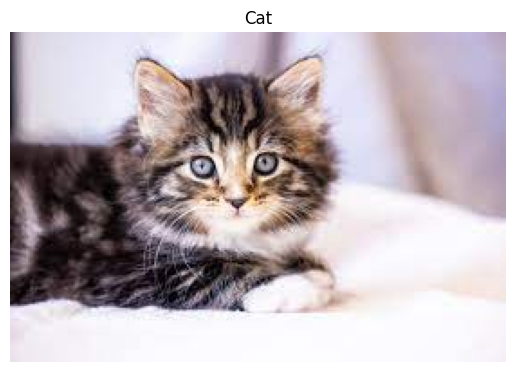

In [24]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB))
plt.title(label)
plt.axis("off")
plt.show()

In [25]:
from google.colab import files
files.download("cat_dog_classifier.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>